### 1.정규성 검정(Normality Test)
- 귀무가설 - 데이터셋이 정규분포를 따른다
- 대립가설 - 데이터셋이 정규분포를 따르지 않는다
- 유의수준 0.05 인 경우 : p-value > 0.05, 정규성이 보장된다고 할 수 있다
- 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data_02/sleepage.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   stime20s  20 non-null     int64
 1   stime40s  20 non-null     int64
 2   ID        20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [4]:
# 그룹을 나누어 저장함
gA = df['stime20s']
gB = df['stime40s']

#### 정규성 검정 1. [shapiro] 
- 샤피로-윌크 검정(shapiro wilks test)
- 표본수(n)가 5000개 미만인 데이터셋에 적합

In [7]:
from scipy.stats import shapiro
print(shapiro(gA)) # 정규성 만족
print(shapiro(gB)) # 정규성을 만족하지 않음

ShapiroResult(statistic=0.9239299893379211, pvalue=0.11795635521411896)
ShapiroResult(statistic=0.8809685707092285, pvalue=0.01841725781559944)


ShapiroResult(statistic=0.9603756070137024, pvalue=0.551380455493927)

#### 정규성 검정 2. [kstest]
- 콜모고로프 스미르노프 검정(kolmogorov-smirnov test)
- 표본수(n)가 5000개 초과인 데이터셋에 적합

In [16]:
# 두 개의 데이터가 같은 분포인지 아닌지 검정
# 귀무가설 : 두집단의 분포가 같다
# 대립가설 : 두집단의 분포가 다르다
from scipy.stats import kstest 
print(kstest(gA, gA))  # 정규성을 만족함
print(kstest(gA, gB))  # 정규성을 만족함
print(kstest(gA, 'norm'))  # 정규성을 만족하지 않음
print(kstest(gB, 'norm')) # 정규성을 만족하지 않음

KstestResult(statistic=0.0, pvalue=1.0)
KstestResult(statistic=0.15, pvalue=0.9831368772656193)
KstestResult(statistic=0.9986501019683699, pvalue=8.073266280952718e-58)
KstestResult(statistic=0.9999997133484281, pvalue=2.8061866176047734e-131)


#### 정규성 검정 3. [normaltest] 
 - 표본수 8개 이상 필요

In [17]:
from scipy.stats import normaltest
print(normaltest(gA)) # 정규성 만족
print(normaltest(gB)) # 정규성 만족

NormaltestResult(statistic=1.173158148726697, pvalue=0.5562268444276741)
NormaltestResult(statistic=2.045029526680344, pvalue=0.3596892684891455)


#### 정규성 검정 4. [anderson]
- 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다

In [20]:
from scipy.stats import anderson # statistic, critical_values, significance_level
print(anderson(gA)) # 0.56 < 0.57  유의수준 10%에서 정규성 만족. 즉, 유의수준 10%에서 귀무가설 채택
print(anderson(gB)) # 0.89 < 0.96  유의수준 1%에서 정규성 만족. 즉, 유의수준 1%에서 귀무가설 채택

AndersonResult(statistic=0.56010976028562, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.8918678522034895, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


### 2.등분산성 검정

In [45]:
# 파일 읽어와 내용 확인
import seaborn as sns
iris = sns.load_dataset('iris')

In [46]:
# 품종별 그룹을 나누어 저장, sepal_length의 등분산성 검정
setosa = iris[iris['species']=='setosa'].sepal_length
versicolor = iris[iris['species']=='versicolor'].sepal_length
virginica = iris[iris['species']=='virginica'].sepal_length

# 정규성검정
print(shapiro(setosa))
print(shapiro(versicolor))
print(shapiro(virginica))
# 귀무가설 채택 - 정규성 만족

ShapiroResult(statistic=0.9776989221572876, pvalue=0.4595281183719635)
ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867)
ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)


#### 등분산성 검정 1. [bartlett]
- burtlett : 데이터셋의 크기가 서로 다른 2개 이상의 집단 사용 가능

In [52]:
from scipy.stats import bartlett
bartlett(gA, gB, gC)
# 귀무가설 기각 - 등분산성 만족하지 않음

BartlettResult(statistic=16.005701874401502, pvalue=0.0003345076070163035)

#### 등분산성 검정 2. [levene]
- levene: 정규성을 충족하지 않는 비모수 데이터에 대해서도 사용가능 (center default: median)
- 즉, levene의 검정은 정규성에서 상당한 편차가 있는 경우 bartlett 검정의 대안입니다 .

In [ ]:
from scipy.stats import levene
levene(gA, gB, gC)
# 귀무가설 기각 - 등분산성 만족하지 않음

#### 등분산성 검정 3. [fligner]
- fligner : 정규성을 충족하지 않는 비모수 데이터에 대해서도 사용가능 (center default: median)

In [54]:
from scipy.stats import fligner
fligner(gA, gB, gC)
# 귀무가설 기각 - 등분산성 만족하지 않음

FlignerResult(statistic=11.617980621101292, pvalue=0.0030004580742585885)

### 3.T 검정(평균 검정)

t-test 이해
- 스튜던트 t-테스트(Student's t-test)라고도 하며, 검정 통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정
- 표본을 사용한 모평균 검정 및 두 데이터 세트(집단)의 모평균이 서로 유의하게 다른지 여부를 판별 할 수 있음
- 검정통계량이 정규 분포를 따르며 모집단의 분산, 표준편차를 알지 못할 때 표본으로 부터 추정된 분산/표준편차를 사용해 검정함
- t-test를 실시하기 위해서는 정규성 및 등분산성의 조건이 만족되어야 함


In [58]:
# 샘플 파일 불러오기
df = pd.read_csv("./data_02/sleepage.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


#### T 검정 1.ttest_1samp
- 20대 평균 수면시간에 대한 one samle t-test
- 유의수준은 5% 사용
- 숫자는 반올림하여 소수점 아래 4번째 자리까지 표시

- 가설 1.alternative='two-sided'
- 귀무가설 - 20대 수면시간의 평균은 6시간이다.
- 대립가설 - 20대 수면시간의 평균은 6시간이 아니다.

In [96]:
from scipy.stats import ttest_1samp
ttest_1samp = ttest_1samp(df['stime20s'], popmean = 6)
print(ttest_1samp)

Ttest_1sampResult(statistic=0.45918493167748414, pvalue=0.6513113734805238)


In [97]:
# 가설1 결과
# p-value 가 0.05보다 크다
# 귀무가설을 채택
# 20대 수면시간의 평균은 6시간이다
print('귀무가설 기각' if ttest_1samp.pvalue < 0.05 else '귀무가설 채택')

귀무가설 채택


가설-2. alternative='less'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 크거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 작다

In [98]:
from scipy.stats import ttest_1samp
ttest_1samp = ttest_1samp(df['stime20s'], popmean = 6, alternative='less')
print(ttest_1samp)

Ttest_1sampResult(statistic=0.45918493167748414, pvalue=0.6743443132597382)


In [99]:
# 가설2 결과
# p-value 가 0.05보다 크다
# 귀무가설을 채택해야한다
# 20대 수면시간의 평균은 6시간 보다 크거나 같다.
print('기각' if pvalue < 0.05 else '채택')

채택


가설-3. alternative='greater'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 작거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 크다

In [100]:
from scipy.stats import ttest_1samp
ttest_1samp = ttest_1samp(df['stime20s'], popmean = 6, alternative='greater')
print(ttest_1samp)

Ttest_1sampResult(statistic=0.45918493167748414, pvalue=0.3256556867402619)


In [101]:
# 가설3 결과
# p-value 가 0.05보다 크다
# 귀무가설을 채택해야 한다
# 20대 수면시간의 평균은 6시간 보다 작거나 같다.
print('귀무가설 기각' if pvalue < 0.05 else '귀무가설 채택')

귀무가설 채택


In [102]:
# [9] 95% 신뢰구간 구하기 .....?????
# from scipy.stats import t, sem
# target = df['stime20s']
# lower, upper = t(df=len(target)-1).interval(0.95, loc=target.mean(), scale=sem(target))
# print(f'{lower:.4f} ~ {upper:.4f}')

#### T 검정 2. ttest_ind
- 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 예) 20대와 40대의 수면 시간은 같다
- stats.test_ind : (two INDependent sample이라 해서 ttest_ind )
- t값과 two-tail p-value를 반환함
- ttest_ind(a, b, equal_var=False) : Welch's t-test 수행 (등분산이 아닌 경우)

In [123]:
# [1] 샘플 파일 불러오기
import pandas as pd
df2 = pd.read_csv('./data_02/sleepage.csv')
print(df2.shape)
df2.T

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


In [128]:
# [2] 그룹 분할 후 평균 구하기
stime20s = df2['stime20s']
stime40s = df2['stime40s']

print(stime20s.mean(), stime40s.mean())

6.15 6.35


In [132]:
# [3] 정규성 및 등분산성 확인
from scipy.stats import shapiro
from scipy.stats import bartlett, levene, fligner

print('-'*80)
print('정규성 검정')
print(shapiro(stime20s)) # 정규성 만족
print(shapiro(stime40s)) # 정규성 만족하지 않음
print('-'*80)
print('등분산성 검정')
print(bartlett(stime20s, stime40s)) # 등분산성 만족
print(levene(stime20s, stime40s)) # 등분산성 만족
print(fligner(stime20s, stime40s)) # 등분산성 만족

--------------------------------------------------------------------------------
정규성 검정
ShapiroResult(statistic=0.9239299893379211, pvalue=0.11795635521411896)
ShapiroResult(statistic=0.8809685707092285, pvalue=0.01841725781559944)
--------------------------------------------------------------------------------
등분산성 검정
BartlettResult(statistic=2.0981070027224096, pvalue=0.1474816309742059)
LeveneResult(statistic=1.48051948051948, pvalue=0.2311967404777494)
FlignerResult(statistic=1.7911133505274075, pvalue=0.18079057109915886)


가설1. alternative='two-sided'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0과 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0과 같지 않다
- 귀무가설 : groupA, groupB의 평균은 동일하다
- 대립가설 : groupA, groupB의 평균은 동일하지 않다

In [133]:
from scipy.stats import ttest_ind
ttest_ind(stime20s, stime40s, alternative = 'two-sided')

Ttest_indResult(statistic=-0.49877099363500604, pvalue=0.6208158262957915)

In [ ]:
# 가설1 결과
# pvalue가 0.05보다 큰값 (0.6208)
# 귀무가설을 채택해야함
# 즉, 20대와 40대의 평균 수명 시간에 차이가 없다. (동일하다)
print('귀무가설 기각' if pvalue < 0.05 else '귀무가설 채택')

채택


가설2. alternative='less'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 크거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 작다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 크거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 작다

In [134]:
from scipy.stats import ttest_ind
ttest_ind(stime20s, stime40s, alternative = 'less')

Ttest_indResult(statistic=-0.49877099363500604, pvalue=0.31040791314789573)

In [135]:
# 가설2 결과
# pvalue가 0.05보다 큰 값(0.3104)
# 귀무가설을 채택해야함
# 즉, groupA의 평균 - groupB의 평균이 0보다 크거나 같다
# groupA의 평균이 groupB의 평균보다 크거나 같다
print('귀무가설 기각' if pvalue < 0.05 else '귀무가설 채택')

귀무가설 채택


가설3. alternative='greater'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 작거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 크다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 작거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 크다

In [136]:
from scipy.stats import ttest_ind
ttest_ind(stime20s, stime40s, alternative = 'greater')

Ttest_indResult(statistic=-0.49877099363500604, pvalue=0.6895920868521042)

In [137]:
# 가설3 결과
# pvalue가 0.05보다 큰 값(0.6896)
# 귀무가설을 채택해야함
# 즉, groupA의 평균 - groupB의 평균이 0보다 작거나 같다
# groupA의 평균이 groupB의 평균보다 작거나 같다
print('귀무가설 기각' if pvalue < 0.05 else '귀무가설 채택')

귀무가설 채택


#### 3-3.Paired t-test 
- 동일한 특성을 같는 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 처치 전/후 비교(효과 검정), 한 집단에 대해 두 가지 방법에 대한 차이 검정 등에 사용
- 등분산성 검정은 하지 않아도 됨
- 두 약 투여에 따른 추가 수면 시간 평균의 차이가 있는가?
- stats.ttest_rel: (two RELated samples)

In [138]:
# [1] 샘플 데이터 가져오기
import pandas as pd
import numpy as np
df2 = pd.read_csv('./data_02/sleep.csv')
df2.T

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
extra,0.7,-1.6,-0.2,-1.2,-0.1,3.4,3.7,0.8,0.0,2.0,1.9,0.8,1.1,0.1,-0.1,4.4,5.5,1.6,4.6,3.4
group,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0


In [139]:
# [2] 그룹 나누기
gA = df2.loc[df2.group==1, 'extra']
gB = df2.loc[df2.group==2, 'extra']

In [157]:
# [3] 정규성 검정(shapiro)
from scipy.stats import shapiro
print(shapiro(gA)) # 정규성 만족
print(shapiro(gB)) # 정규성 만족

ShapiroResult(statistic=0.9258062243461609, pvalue=0.4079307019710541)
ShapiroResult(statistic=0.9192975759506226, pvalue=0.35113343596458435)


가설1. alternative='two-sided'
- 귀무가설 : gA의 평균 - gB의 평균이 0과 같다
- 대립가설 : gA의 평균 - gB의 평균이 0과 같지 않다
- 귀무가설 : gA와 gB의 평균은 같다
- 대립가설 : gA와 gB의 평균은 같지 않다

In [158]:
from scipy.stats import ttest_rel
ttest_rel = ttest_rel(gA, gB, alternative='two-sided')
print(ttest_rel)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)


In [159]:
# 가설1 결과
# p-value 가 0.05보다 작음
# 귀무가설을 기각한다
# gA와 gB의 평균은 같지 않다
print('귀무가설 기각' if ttest_rel.pvalue < 0.05 else '귀무가설 채택')  

귀무가설 기각


가설2. alternative='less'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 크거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 작다
- 귀무가설 : gA의 평균이 gB의 평균보다 크거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 작다

The t-statistic is calculated as np.mean(a - b)/se, where se is the standard error. Therefore, the t-statistic will be positive when the sample mean of a - b is greater than zero and negative when the sample mean of a - b is less than zero

In [168]:
from scipy.stats import ttest_rel
ttest_rel = ttest_rel(gA, gB, alternative='less')
print(ttest_rel)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.001416445098692135)


In [169]:
# 가설2 결과
# p-value 가 0.05보다 작음
# 귀무가설을 기각한다
# gA의 평균이 gB의 평균보다 작다
print('귀무가설 기각' if ttest_rel.pvalue < 0.05 else '귀무가설 채택')  

귀무가설 기각


가설3. alternative='greater'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 작거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 크다
- 귀무가설 : gA의 평균이 gB의 평균보다 작거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 크다

In [170]:
from scipy.stats import ttest_rel
ttest_rel = ttest_rel(gA, gB, alternative='greater')
print(ttest_rel)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.9985835549013078)


In [171]:
# 가설3 결과
# p-value 가 0.05보다 큼
# 귀무가설을 채택한다
# gA의 평균이 gB의 평균보다 작거나 같다
print('귀무가설 기각' if ttest_rel.pvalue < 0.05 else '귀무가설 채택')  

귀무가설 채택


#### 3-4.분류 모델에서 활용
- 1개 연속형 변수, 1개 범주형 변수 (2개 범주)
- 범주별로 연속형 변수의 평균 차이가 있는지 검정한다

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/1st_Train.csv')
data.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [ ]:
# t-test
# 연속형 변수 : 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
# 범주형 변수 : 'Reached.on.Time_Y.N'

from scipy.stats import shapiro, kstest, bartlett
from scipy.stats import ttest_ind

# [1] 그룹 나누기
feature = 'Cost_of_the_Product'
condition_0 = data['Reached.on.Time_Y.N'] == 0
condition_1 = data['Reached.on.Time_Y.N'] == 1
group0 = data.loc[condition_0, feature]
group1 = data.loc[condition_1, feature]
print(feature, group0.shape, group1.shape)

# [2] 정규성, 등분산성 검정
statistic, pvalue = shapiro(group0)
print(f'shapiro - statistic:{statistic:.4f}, p-value:{pvalue:.4f}')
statistic, pvalue = shapiro(group1)
print(f'shapiro - statistic:{statistic:.4f}, p-value:{pvalue:.4f}')

statistic, pvalue = kstest(group0, 'norm')
print(f'kstest - statistic:{statistic:.4f}, p-value:{pvalue:.4f}')
statistic, pvalue = kstest(group1, 'norm')
print(f'kstest - statistic:{statistic:.4f}, p-value:{pvalue:.4f}')
# p-value: 0.0000, 정규성을 만족하지 않음

statistic, pvalue = bartlett(group0, group1)
print(f'bartlett - statistic:{statistic:.4f}, p-value:{pvalue:.4f}')
# p-value:0.6516, 등분산성을 만족

# [3] ttest_ind
statistic, pvalue = ttest_ind(group0, group1)
print(f'ttest_ind - statistic:{statistic:.4f}, p-value:{pvalue:.4f}')

# [4] 결론
# p-value 0.05 보다 작음
# 귀무가설을 기각한다.
# 두 그룹의 평균이 다르다! 
# statistic:7.7378 (group0의 평균이 더 크다)
mean_g0, mean_g1 = group0.mean(), group1.mean()
print(f'{mean_g0:.4f}, {mean_g1:.4f}')

Cost_of_the_Product (4436,) (6563,)
shapiro - statistic:0.9719, p-value:0.0000
shapiro - statistic:0.9723, p-value:0.0000
kstest - statistic:1.0000, p-value:0.0000
kstest - statistic:1.0000, p-value:0.0000
bartlett - statistic:0.2039, p-value:0.6516
ttest_ind - statistic:7.7378, p-value:0.0000
214.4986, 207.2892


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
def my_ttest_ind(data, feature, target):
    group0 = data.loc[data[target] == 0, feature]
    group1 = data.loc[data[target] == 1, feature]
    mean_g0, mean_g1 = group0.mean(), group1.mean()
    print(f'{mean_g0:.4f}, {mean_g1:.4f}')
    _, pvalue = ttest_ind(group0, group1)
    print(f'ttest_ind - p-value:{pvalue:.4f}')
    print('유의미' if pvalue < 0.05 else '의미가 없다')

# 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
for feature in ['Cost_of_the_Product', 'Weight_in_gms',
                'Discount_offered']:
    print(feature)
    my_ttest_ind(data, feature, 'Reached.on.Time_Y.N') 

Cost_of_the_Product
214.4986, 207.2892
ttest_ind - p-value:0.0000
유의미
Weight_in_gms
4168.6684, 3272.6401
ttest_ind - p-value:0.0000
유의미
Discount_offered
5.5460, 18.6637
ttest_ind - p-value:0.0000
유의미


#### 3-5.모평균에 관한 t-test
A 회사에서 판매하는 모니터는 평균 5개 보다 적은 불량화소를 포함한다고 주장한다. 이 주장을 판단하기 위해서 데이터를 수집했으며, 주어진 데이터(data_02/defective.csv)에는 모니터 25개에서 조사한 불량화소 개수가 저장되어 있다. 
- 불량화소의 개수는 정규분포를 따른다고 할 때, 이 주장의 타당성 여부를 유의수준 5%에서 검정하여라
- 𝑯_𝟎  : 𝝁≥𝟓, 𝑯_𝟏  : 𝝁<𝟓, defective_pixel :  불량화소 개수
- (a) 불량화소의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.



In [71]:
# 귀무가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 크거나 같다.
# 대립가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 적다.

import pandas as pd
from scipy.stats import ttest_1samp

data = pd.read_csv('data_02/defective.csv')
#print(data.shape)
#print(data.head(3))
print(round(data['defective_pixel'].mean(), 2))
statistics, pvalue = ttest_1samp(data['defective_pixel'], 5, alternative='less')
print(round(statistics, 4))
print(round(pvalue, 4))
print('기각' if pvalue < 0.05 else '채택')

4.84
-1.4446
0.0807
채택


#### 3-6.작업3유형 예시문제
주어진 데이터(data_02/blood_pressure.csv)에는 고혈압 환자 120명의 치료 전후의 혈압이 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 쌍체표본 t-검정(paired t-test)를 통해 답하고자 한다. 가설은 아래와 같다
- 𝑯_𝟎  : 𝝁_𝒅≥𝟎, 𝑯_𝟏  : 𝝁_𝒅<𝟎  (𝝁_𝒅 : 치료 후 혈압 – 치료 전 혈압)의 평균
- bp_before : 치료 전 혈압, bp_after : 치료 후 혈압
- (a) ud의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.


In [70]:
import pandas as pd
from scipy.stats import ttest_rel

# 귀무가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 크거나 같다.
# 대립가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 작다
# 귀무가설: 치료 후 혈압이 치료 전 혈압보다 크거나 같다.
# 대립가설: 치료 후 혈압이 치료 전 혈압보다 작다
data = pd.read_csv('data_02/blood_pressure.csv')
#print(data.shape)
#print(data.head(3))
data['ud'] = data['bp_after'] - data['bp_before']
print(round(data['ud'].mean(), 2))  # -5.09
statistic, pvalue = ttest_rel(data['bp_after'], data['bp_before'], 
                              alternative='less')
print(round(statistic, 4))  # -3.3372
print(round(pvalue, 4))
print('기각' if pvalue < 0.05 else '채택')

-5.09
-3.3372
0.0006
기각


### 4.ANOVA(분산 분석)
- t-test는 1개 또는 2개의 집단에 대해 평균 검정
- 독립변수 – 범주형, 종속변수 – 연속형으로 하는, 3개 이상의 집단 평균을 비교하는 모수 추론 방법
- "집단간분산" /"집단내분산"    기반의 F 분포를 이용해 가설을 검정하며 정규성, 등분산성, 독립성을 가정함
- "집단 간 분산"과 "집단 내 분산"을 이용해 분석하는 방법이어서 "분산분석"이라고 함
- 귀무가설 기각 시 구체적인 차이를 파악하기 위해, 사후 검정(Post Hoc test)이 필요함
- 등분산/동일 크기 표본 - Tukey검정, 등분산/다른 크기 표본 – Scheff 검정, Fisher’s LSD 검정 등이 있음


In [5]:
#출처 : https://partrita.github.io/posts/ANOVA-python/
#https://github.com/thomas-haslwanter/statsintro_python/blob/master/ipynb/8_anovaOneway.ipynb
#https://ggbaker.ca/data-science/content/stats-tests.html    
#https://lunch-box.tistory.com/76?category=873052

#### 4-1.분산의 중요성
- 평균값은 동일하지만 분산 값이 다름으로 인해 전체적인 데이터의 모습이 완전히 달라 보임
- 분산이 클수록 집단의 평균값의 차이가 무의미해진다
- **집단간 평균값의 분산이 클수록, 집단내 분산이 작아질 수록 평균의 차이가 분명해진다.**


In [6]:
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(std):
    centers = [5, 5.3, 4.5]
    colors = 'brg'
    size = 100
    plt.figure(figsize=(4,3))
    for i in range(3):
        x = norm(centers[i], std).rvs(size)  
        y = np.arange(size) + i*size     
        plt.plot(x, y, '.', color=colors[i])
    plt.show() 

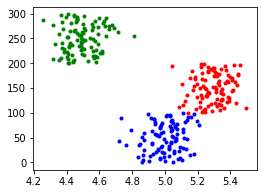

In [7]:
draw_graph(std=0.1)

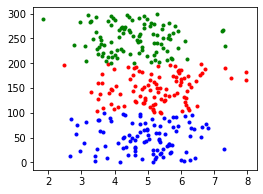

In [8]:
draw_graph(std=1)

#### 4-2.일원분산분석(One-way ANOVA)
- 독립변수 : 범주형 1개, 종속변수 : 연속형
- 독립변수의 변화가 종속변수에 미치는 영향을 보기 위해 사용
- 가정 : 독립성, 정규성, 등분산성
- scipy.stats이나 statsmodel 라이브러리를 이용

### 예시 데이터 설명
- iris의 target이 0 : 'setosa', 1 : 'versicolor', 2: 'virginica' 품종
- 독립변수 :'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'   
- 품종별 sepal, petal의 length, width가 차이를 보일까?에 anova 사용

In [26]:
# [1] 데이터 가져오기
import pandas as pd
iris = pd.read_csv('bigdata/iris_data.csv')

In [29]:
# [2-2] 특정 변수에 대한 품종별 평균 확인
feature = 'sepal_width'

- group 0, 1, 2의 평균의 차이가 있습니다
- 평균값의 차이가 실제로 의미가 있는 차이인지 알고 싶다면, 분산 분석을 통해 통계적 유의성을 알아 볼 수 있습니다.

In [30]:
for x in iris.groupby('target')[feature]:
    print(x[0], x[1].values)

KeyError: 'Column not found: sepal_width'

In [32]:
# [3] 그룹 추출 및 그래프로 확인
data = [x[1].values for x in iris.groupby('target')['sepal_width']]

KeyError: 'Column not found: sepal_width'

Scipy.stats 으로 일원분산분석
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [31]:
# [6] 일원분산분석 - 1
from scipy.stats import f_oneway
f_oneway(*data)

NameError: name 'data' is not defined

pandas 와 statsmodels 를 사용한 일원분산분석
- https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html
- https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html 

ols (ordinary least squares) 모델 
- 구하려는 해와 실제의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법

'value ~ C(treatment)' : '종속변수 ~ C(독립변수)'
- value : 종속변수
- treatment : 범주형(C)인 독립변수
- df : degree of freedom
- C(treatment)의 df : 그룹의 수 - 1
- Residual의 df : 전체 데이터 수 - 그룹의 수

In [ ]:
# [7] 일원분산분석 - 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = iris[['target', 'sepal_width']]
lm = ols('sepal_width ~ C(target)', data).fit()
result = sm.stats.anova_lm(lm)
print(result)

              df     sum_sq   mean_sq         F        PR(>F)
C(target)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual   147.0  16.962000  0.115388       NaN           NaN


In [ ]:
# C(target)의 PR(=p-value) 값이 0.05 보다 작으므로 그룹의 
# 평균값이 통계적으로 유의미하게 차이가 있음

In [ ]:
# 구체적으로 어떤 집단이 차이가 있는지 확인하려면 
# 사후분석(post hoc tests)를 해야함
# 유의미한 차이가 없는 경우는 사후분석할 필요가 없음

사후검정(Post Hoc Analysis)
- ANOVA 분석의 문제 : 다르다는 것은 알지만, 어떤 집단간의 차이가 있는지는 알 수 없음
- 사후검정을 통해 어떤 것에 차이가 있는지 찾을 수 있음
- post hoc은 라틴어로 "after this"의 뜻
- 사후검정의 종류
    - Tukey's HSD (Honest Significant Difference) test : 정규분포, 등분산, 동일 표본 크기에서 가장 많이 사용
    - Duncan’s new multiple range test (MRT) : 정규분포, 등분산, 동일 표본 크기에서 사용, 엄격하지 않은 기준으로 통계적 유의성을 도출하기 쉬움
    - Scheffé’s Method : 가장 보수적이고 엄격한 사후검정방식 (동일하지 않은 표본 크기)
- 민감도(sensitivity)로 구분 : Scheffe < Tukey < Duncan
- Duncan의 방법은 작은 차이에도 차이가 난다라고 하지만, Scheffe의 방법은 확실한 차이가 나야만 비로소 차이가 있다라고 판단함


Tukey test
- statsmodels의 Tukey test를 하기 위해서는 DataFrame의 형태를 변경해야 함
- 하나의 컬럼은 분류할수 있는 이름(label)을 다른 컬럼은 실험값(values)를 가지고 있는 형태이어야 함

[참고] scheffe : https://eunholand.tistory.com/96

In [ ]:
# [7] 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(iris.sepal_width, iris.target, alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658    0.0 -0.8189 -0.4971   True
     0      2   -0.454    0.0 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


In [ ]:
# 결과를 보면 모든 그룹에서 통계적인 유의미성(P-value < 0.05)을 가질 수 있는것을 확인 할 수 있음

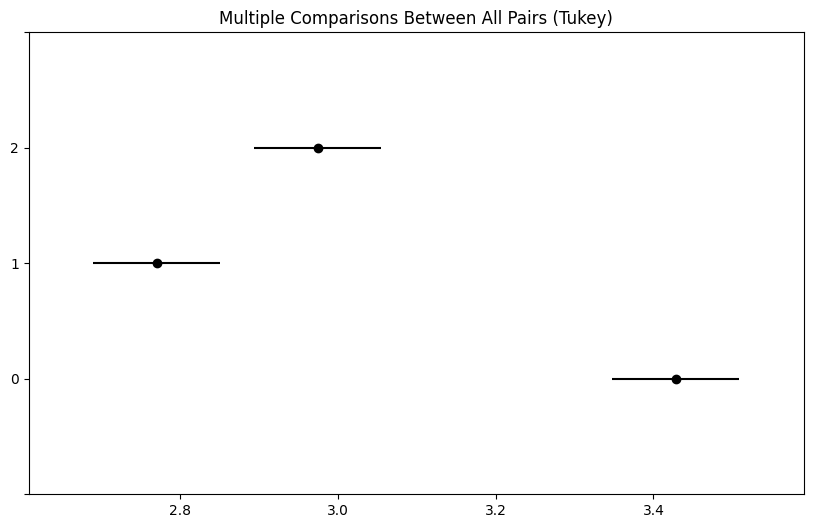

In [ ]:
# [8] 그림으로 확인하기
fig = posthoc.plot_simultaneous()

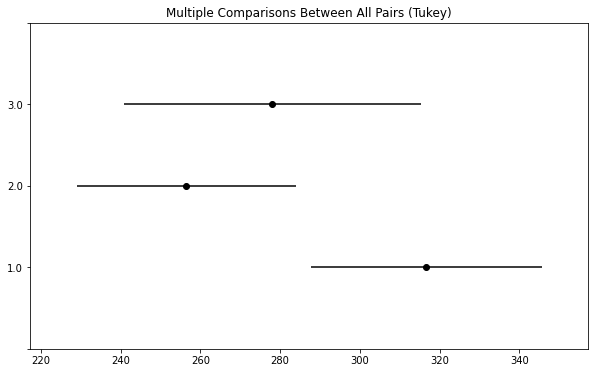

In [ ]:
# 통계적 의미 갖지 않는 경우
# 그림에서 볼 수 있듯이, 그룹 1.0과 2.0은 서로 겹치지 않는것을 볼 수 있음
# 반면,1과 3, 2와 3은 겹치기 때문에 유의미한 차이가 없다고 할 수 있음

In [ ]:
##  23년 5월 31일 오전 - 여기까지

아래 부분은 아직 강의 작업을 해야합니당

#### 4-3.이원분산분석(Two-way ANOVA)
- 독립변인의 수가 두 개일 때 집단 간 차이가 유의한지를 검증하는 데 사용
- 상호작용효과(Interaction effect) 즉, 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용됨
- scipy.stats이나 statsmodels 라이브러리를 이용

예제 데이터(altman_12_6) 설명
태아의 머리 둘레 측정 데이터입니다. 
4명의 관측자가 3명의 태아를 대상으로 측정을 했습니다. 
이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하였습니다.

In [ ]:
# [1] 데이터 가져오기
import pandas as pd
data = pd.read_csv('data_02/altman.csv')
data.tail()

,head_size,fetus,observer
31,12.7,3.0,3.0
32,12.5,3.0,3.0
33,13.0,3.0,4.0
34,12.9,3.0,4.0
35,13.8,3.0,4.0


In [ ]:
data['fetus'].value_counts(), data['observer'].value_counts()

(1.0    12
 2.0    12
 3.0    12
 Name: fetus, dtype: int64,
 1.0    9
 2.0    9
 3.0    9
 4.0    9
 Name: observer, dtype: int64)

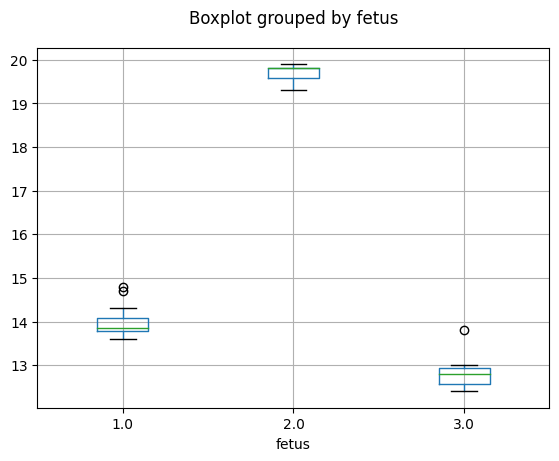

In [ ]:
# [2] 태아별 머리 둘레 plot 만들기
import matplotlib.pyplot as plt
data.boxplot(column='head_size', by='fetus' , grid=True)
plt.title('')
plt.show()

In [ ]:
# [3] 태아별 머리 둘레 평균을 구해봅니다
data.groupby('fetus')['head_size'].mean()

fetus
1.0    13.991667
2.0    19.691667
3.0    12.825000
Name: head_size, dtype: float64

In [ ]:
# 그림에서 태아(fetus) 3명의 머리 둘레는 차이가 있어 보입니다.
# 관측자와 태아에 상호작용 효과 여부를 Two way ANOVA를 통해 알아 보겠습니다

In [ ]:
# 귀무가설 : 관측자별 머리둘레 평균은 동일하다
# 대립가설 : 관측자별 머리둘레 평균은 동일하지 않다 (차이가 있다)
# 귀무가설 : 태아별 머리둘레 평균은 동일하다
# 대립가설 : 태아별 머리둘레 평균은 동일하지 않다 (차이가 있다)
# 귀무가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
# 대립가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 있다

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [ ]:
# C(fetus):C(observer)의 P-value 가 0.05 이상 입니다, 
# 따라서 귀무가설을 기각할 수 없고. 
# 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
